In [1]:
import h5py
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np
# hf = h5py.File(r'C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5', "r")
# image= hf["data"]


C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(25,) (120, 25)
(120, 25)
Global [0.85616215+0.44359637j 0.86636624+0.43941875j 0.85302644+0.45669867j
 0.86837763+0.41761073j 0.82106732+0.37943993j 0.89322733+0.37672444j
 0.8839    +0.43381017j 0.88980441+0.42105522j 0.87921243+0.41832831j
 0.55770971+0.27337359j 0.866843  +0.43378837j 0.89109694+0.41698361j
 0.89902722+0.40847889j 0.89363103+0.40418449j 0.83826262+0.415977j
 0.88389838+0.39486662j 0.85293561+0.46381093j 0.8799793 +0.43287568j
 0.87254028+0.41972447j 0.85342337+0.41115407j 0.92497425+0.16066465j
 0.85859009+0.41482545j 0.83651736+0.40858614j 0.84183646+0.42221533j
 0.81037002+0.43655982j]
Laser (-0.9202126702421962+0.3810875011052348j)
(120, 25)
(120,)


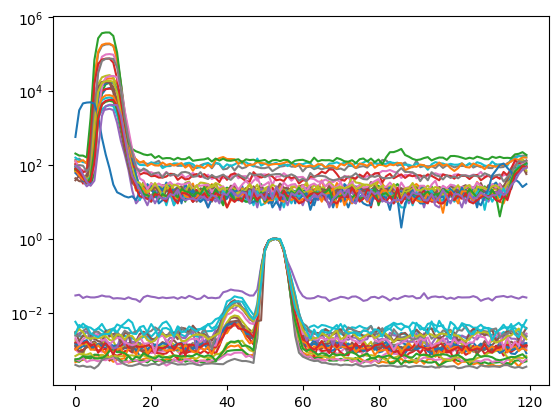

In [5]:
# plt.figure(figsize(5,3))
flim_ref=brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5", slicing = False, step_size = 1)
_=plt.plot(flim_ref.data_hist)

phasors_irf = flim_ref.phasor_global_corrected()

phi_irf = np.angle(phasors_irf)
m_irf = np.abs(phasors_irf)
#plt.figure()
ddd=-120*phi_irf/(2*np.pi)
ggg=np.asarray([brighteyes_flim.linear_shift(flim_ref.data_hist[:,i]/max(flim_ref.data_hist[:,i]), ddd[i]) for i in range(0,25)]).T
print(flim_ref.data_hist.shape)
print(flim_ref.data_laser_hist.shape)
_=plt.plot(ggg)
plt.yscale("log")

(25,) (120, 25)
(120, 25)
Global [0.80900344+0.33047155j 0.82117014+0.32540531j 0.81753442+0.34308557j
 0.82738479+0.30589401j 0.81206583+0.28976382j 0.84268827+0.26475148j
 0.83876139+0.31874846j 0.84532327+0.30775997j 0.83518505+0.3020658j
 0.5695767 +0.20804159j 0.82723953+0.31727853j 0.84468436+0.30228793j
 0.85318181+0.29686993j 0.84350275+0.29087898j 0.81090762+0.30792259j
 0.83511306+0.28242628j 0.81472089+0.34759367j 0.83050264+0.31800716j
 0.82360277+0.30630188j 0.81195625+0.30479377j 0.86932519+0.07367437j
 0.81951388+0.30775027j 0.80988784+0.30627922j 0.80666162+0.31580707j
 0.77791166+0.33626605j]
Laser (-0.7573752944036434+0.6468463658494981j)


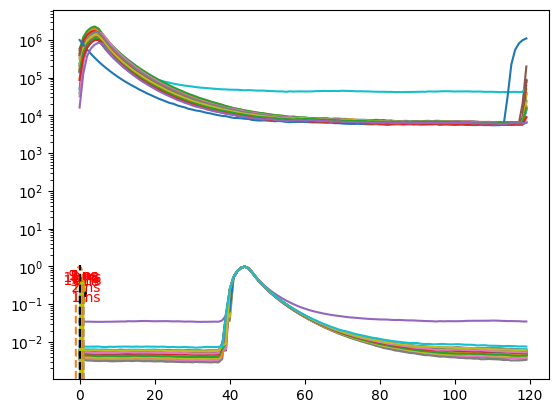

In [7]:
#figure(figsize(5,3))

phasor_forced = 1.

# flim=brighteyes_flim.FlimData("/media/DATA/Downloads/DFD/DFD-Atto495.h5")
flim=brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5")
phasor_global = flim.phasor_global_corrected(phasor_forced/phasors_irf)

_=plt.plot(flim.data_hist)
plt.yscale("log")

#figure()
ddd=120*np.angle(phasor_forced/phasors_irf/phasor_global)/(2*np.pi)
ggg=np.asarray([brighteyes_flim.linear_shift(flim.data_hist[:,i]/np.max(flim.data_hist[:,i]), ddd[i]) for i in range(0,25)]).T
_=plt.plot(ggg)
plt.yscale("log")

#figure(figsize(7,7))


#plt.plot(np.real(phasor_global), np.imag(phasor_global),".k")


#brighteyes_flim.plot_tau()
#brighteyes_flim.plot_universal_circle()

(25,) (120, 25)
(120, 25)
Global [0.80881981+0.33045619j 0.82147792+0.3255167j  0.81740045+0.34315716j
 0.82730916+0.30590627j 0.81223526+0.28971821j 0.84246453+0.26485494j
 0.83873076+0.31873083j 0.84518428+0.30758188j 0.83534675+0.30201808j
 0.56954838+0.20753704j 0.82744942+0.31716784j 0.84453826+0.30230792j
 0.85305405+0.29682052j 0.84362544+0.29061466j 0.81064956+0.30797369j
 0.83512414+0.28251515j 0.81474994+0.34756138j 0.83044257+0.31815707j
 0.8235379 +0.30659485j 0.81174229+0.30489328j 0.86918733+0.07350199j
 0.81955275+0.30762434j 0.80951594+0.3062101j  0.80672845+0.3158362j
 0.77771872+0.33620528j]
Laser (-0.7573753099461322+0.6468463448545002j)


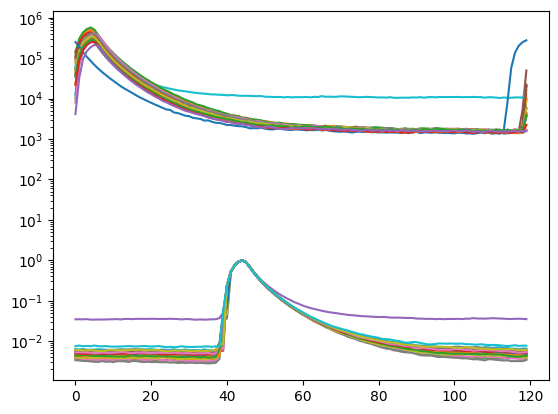

In [6]:
# perform phasor analysis on slices of the whole h5 image
import h5py
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize(5,3))
flim_ref=brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5", slicing = True, step_size = 2)
_=plt.plot(flim_ref.data_hist)

phasors_irf = flim_ref.phasor_global_corrected()

phi_irf = np.angle(phasors_irf)
m_irf = np.abs(phasors_irf)
#plt.figure()
ddd=-120*phi_irf/(2*np.pi)
ggg=np.asarray([brighteyes_flim.linear_shift(flim_ref.data_hist[:,i]/max(flim_ref.data_hist[:,i]), ddd[i]) for i in range(0,25)]).T
_=plt.plot(ggg)
plt.yscale("log")

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


used pre_filter  0.1
(25,) (120, 25)
(120, 25)
Global [0.88369789+0.45763996j 0.88764121+0.44985325j 0.8786508 +0.46731914j
 0.89550867+0.43384859j 0.89917024+0.42553845j 0.91660729+0.38732933j
 0.89305279+0.43905054j 0.90004963+0.42522579j 0.89884969+0.42628825j
 0.88827289+0.44662956j 0.89030008+0.44428228j 0.90301049+0.41834864j
 0.9066255 +0.41041476j 0.90747291+0.40838137j 0.88791123+0.44808686j
 0.90899412+0.40488045j 0.87312298+0.4774758j  0.89297232+0.43924462j
 0.89563927+0.43374407j 0.89362995+0.43764093j 0.97918834+0.17607465j
 0.89415442+0.43667442j 0.8913785 +0.44208684j 0.88808385+0.44884668j
 0.87163897+0.48014947j]
Laser (-0.9202126702421962+0.3810875011052348j)


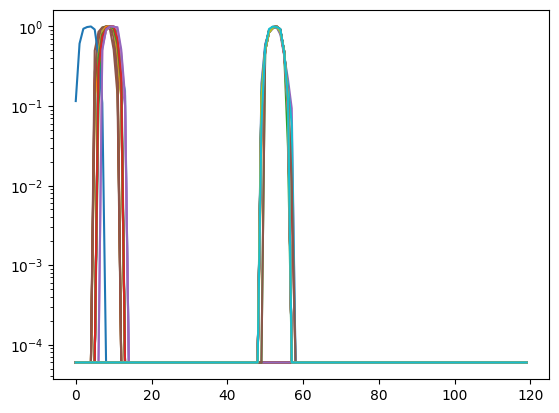

In [1]:
# perform phasor analysis on the whole h5 image
import h5py
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize(5,3))
flim_ref=brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5", pre_filter = 0.1)
_=plt.plot(flim_ref.data_hist)

phasors_irf = flim_ref.phasor_global_corrected()

phi_irf = np.angle(phasors_irf)
m_irf = np.abs(phasors_irf)
#plt.figure()
ddd=-120*phi_irf/(2*np.pi)
ggg=np.asarray([brighteyes_flim.linear_shift(flim_ref.data_hist[:,i]/max(flim_ref.data_hist[:,i]), ddd[i]) for i in range(0,25)]).T
_=plt.plot(ggg)
plt.yscale("log")

In [2]:
#  plot of the histograms aligned for each pixel 
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np

flim_instance = brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5", pre_filter = 0.1)
_=plt.plot(flim_instance.data_hist)
#phasors_irf = flim_instance.phasor_global_corrected()

phi_irf = np.angle(phasors_irf)
m_irf = np.abs(phasors_irf)
plt.figure()
ddd=-120*phi_irf/(2*np.pi) 
histograms_aligned_per_channel=np.asarray([brighteyes_flim.linear_shift(flim_instance.data_hist[:,i]/max(flim_instance.data_hist[:,i]), ddd[i]) for i in range(0,25)]).T
_=plt.plot(histograms_aligned_per_channel)
plt.yscale("log")

CIAO


TypeError: expected str, bytes or os.PathLike object, not NoneType

used pre_filter  0.1
(49,) (81, 49)
(81, 49)
Global [        nan       +nanj         nan       +nanj         nan       +nanj
         nan       +nanj         nan       +nanj         nan       +nanj
         nan       +nanj         nan       +nanj -0.69866604-0.32244821j
 -0.70684781-0.31944074j -0.66886262-0.31043887j -0.69060585-0.30127105j
 -0.6833699 -0.25443295j         nan       +nanj         nan       +nanj
 -0.72792806-0.24332568j -0.7429268 -0.22898715j -0.7431156 -0.22410229j
 -0.7112439 -0.27102978j -0.68803456-0.28188501j         nan       +nanj
         nan       +nanj -0.7157767 -0.25699739j -0.73601165-0.26436796j
 -0.69708852-0.34342528j -0.69971139-0.31791593j -0.68072047-0.33497124j
         nan       +nanj         nan       +nanj -0.70765007-0.28882969j
 -0.73591048-0.25881256j -0.72612565-0.26274647j -0.69540951-0.26518174j
 -0.65367759-0.28291249j         nan       +nanj         nan       +nanj
 -0.71370013-0.23199892j -0.75356756-0.17812578j -0.71299066-0.23969481j

C:\Users\fdelbufalo\AppData\Local\Programs\Python\Python310\lib\site-packages\brighteyes_flim\lib.py:64: RuntimeWarning: invalid value encountered in divide
  nnn = self.data_hist / np.max(self.data_hist, axis=0)


AttributeError: 'FlimData' object has no attribute 'save_aligned_histogram_per_pixel'

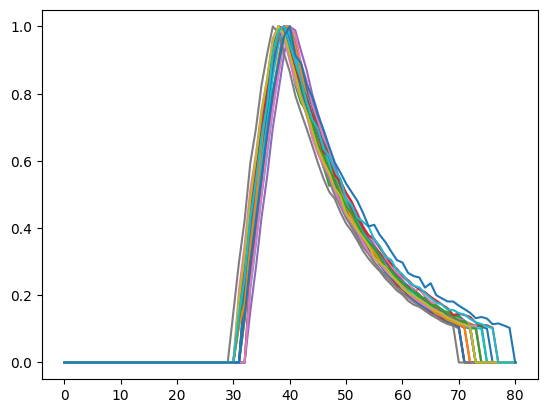

<Figure size 640x480 with 0 Axes>

In [2]:
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np
import h5py

flim_instance = brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-24-01-2024-10-51-12.h5", pre_filter = 0.1)
_=plt.plot(flim_instance.data_hist)
phasors_irf = flim_instance.phasor_global_corrected()
phi_irf = np.angle(phasors_irf)
m_irf = np.abs(phasors_irf)
plt.figure()
ddd=-120*phi_irf/(2*np.pi)

histograms_aligned_per_channel=np.asarray([brighteyes_flim.linear_shift(flim_instance.data_hist[:,i]/max(flim_instance.data_hist[:,i]), ddd[i]) for i in range(0,49)]).T
#_=plt.plot(histograms_aligned_per_channel)
#plt.yscale("log")

saved_histogram_realigned_in_each_pixel = flim_instance.save_aligned_histogram_per_pixel(sub_image_size=100, cyclic=True)
hf = h5py.File('dataset_of_pixel_histogram_aligned', "r")
image_with_histogram_realigned_in_each_pixel = hf["h5_dataset"]
image_with_histogram_realigned_in_each_pixel.shape


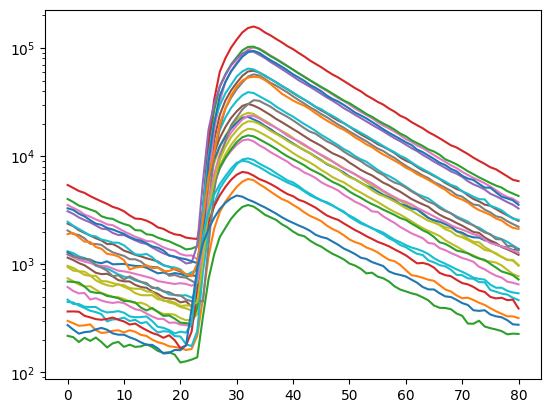

In [2]:

total_num_binphotons_for_all_pixels =  np.sum(image_with_histogram_realigned_in_each_pixel, axis=(0,1)) 
#total_num_binphotons_per_one_pixel
plt.plot(total_num_binphotons_for_all_pixels)
plt.yscale("log")

In [ ]:
#implementing the phasor transformation for each pixel realigned of the image

for i in range(0, image_with_histogram_realigned_in_each_pixel.shape[0]):
    for j in range(0, image_with_histogram_realigned_in_each_pixel.shape[1]):
        pixel_hist = np.sum(image_with_histogram_realigned_in_each_pixel(i,j,:,:), axis=3)  
        flim_instance.calculate_phasor_on_img_ch(pixel_hist)
               

In [1]:
# working on the convallaria sample (2000x2000 image) using the above results. Start from the calibration sample
# to calculate the phasor_irf and then move towards the real sample for correcting the irf in the phasor
import h5py 
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np


print(brighteyes_flim.__file__)
flim_ref=brighteyes_flim.FlimData(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5",
                                  r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5", 
                                  pre_filter=0.1)


#_=plt.plot(flim_ref.data_hist)

# phasors_irf = flim_ref.phasor_global_corrected()

# phi_irf = np.angle(phasors_irf)
# -m_irf = np.abs(phasors_irf)


# ddd = -120*phi_irf/(2*np.pi)
# ggg = np.asarray([brighteyes_flim.linear_shift(flim_ref.data_hist[:,i]/max(flim_ref.data_hist[:,i]), ddd[i]) for i in range(0,25)]).T
# _=plt.plot(ggg)
# plt.yscale("log")

# phasor_forced = 1.


# flim_ins=brighteyes_flim.FlimData()
# phasor_global = flim_ins.phasor_global_corrected(phasor_forced/phasors_irf)

#plt.figure()
# _=plt.plot(flim_ins.data_hist)
# plt.yscale("log")


#saved_histogram_realigned_in_each_pixel = flim_ins.save_aligned_histogram_per_pixel(sub_image_size=200, cyclic=True)
#hf = h5py.File('dataset_of_pixel_histogram_aligned', "r")
#image_with_histogram_realigned_in_each_pixel = hf["h5_dataset"]
#print("shape of the dataset with histograms realigned", image_with_histogram_realigned_in_each_pixel.shape)
#histograms_in_each_channel = np.sum(image_with_histogram_realigned_in_each_pixel, axis = (0,1))
#plt.plot(histograms_in_each_channel)

#plt.figure()
#plt.plot(np.real(phasor_global), np.imag(phasor_global),".k")

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\users\fdelbufalo\pycharmprojects\brighteyes-flim\src\brighteyes_flim\__init__.py
CIAO
(25,) (120, 25)
(120, 25)
(25,) (120, 25)
(120, 25)
used pre_filter  0.1


In [2]:
with h5py.File('dataset_of_pixel_histogram_aligned',"a") as f:
    
        print(f.keys())
        data_input = f["h5_dataset"]  # image with histograms realigned in each pixel
        threshold=1
        harmonic=1
        merge_pixels=1
        phasor_data_size=100
       # print('data input', data_input)
        x_dim, y_dim, channel_dim = data_input.shape[0], data_input.shape[1], data_input.shape[3]

    #calculate the phasors from the histograms contained in h5_dataset
        
        fasors = brighteyes_flim.calculate_phasor_on_img_ch(data_input)
    

    

<KeysViewHDF5 ['h5_dataset']>
data input <HDF5 dataset "h5_dataset": shape (2000, 2000, 120, 25), type "<f4">


In [36]:
import gc
for obj in gc.get_objects():   # Browse through ALL objects
    if isinstance(obj, h5py.File):   # Just HDF5 files
        try:
            print(obj)
            obj.close()
        except:
            pass # Was already closed

<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>
<Closed HDF5 file>


<KeysViewHDF5 ['h5_dataset_p']>
(2000, 2000, 25)
(25,)


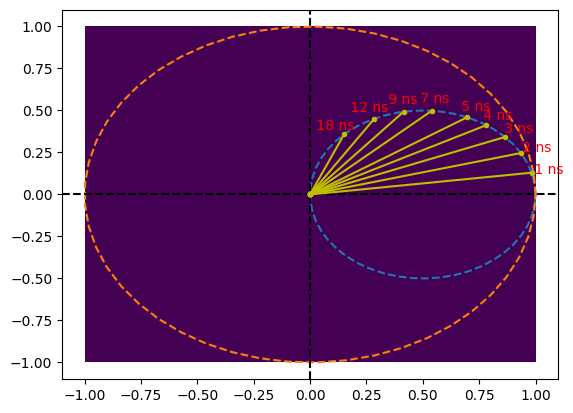

In [13]:
hf_fasori = h5py.File('dataset_of_phasor_per_channel', "r")
print(hf_fasori.keys())

fasors_p = hf_fasori["h5_dataset_p"]  # image with histograms realigned in each pixel
print(fasors_p.shape)
fasors_ph = np.sum(fasors_p, axis = (0,1))
print(fasors_ph.shape)
#fasors_irf=flim_ref.phasor_global_corrected_irf()
#print(fasors_irf.shape)
#fasor_laser = flim_ref.calculate_phasor_laser()
#coef = np.ones(25)
#phasor_global = flim.phasor_global_corrected(1/fasors_irf)
#phasor_processed = brighteyes_flim.correct_phasor(fasors_ph, fasor_laser, 1/coef)
brighteyes_flim.plot_phasor(fasors_ph, bins_2dplot=200, log_scale=False)

In [7]:
phasor_new = brighteyes_flim.calculate_phasor(flim_ref.data_hist)

(25,) (120, 25)
(120, 25)


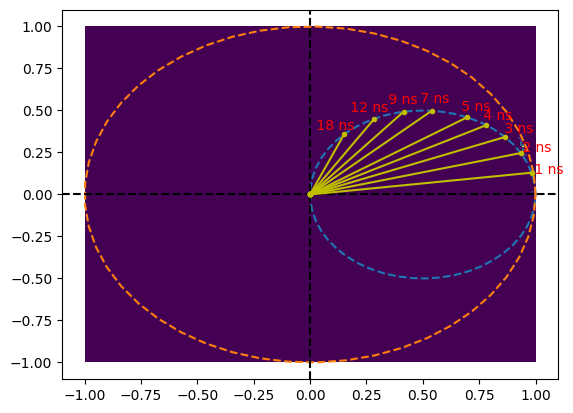

In [8]:
brighteyes_flim.plot_phasor(phasor_new, bins_2dplot=200, log_scale=False)

0	phi: 8.74e-01	m: 3.88e-01		tau_phi: 3.10e-09 	tau_m: 4.22e-09
1	phi: 8.83e-01	m: 3.77e-01		tau_phi: 3.00e-09 	tau_m: 4.02e-09
2	phi: 8.87e-01	m: 3.97e-01		tau_phi: 3.18e-09 	tau_m: 3.95e-09
3	phi: 8.82e-01	m: 3.54e-01		tau_phi: 2.80e-09 	tau_m: 4.05e-09
4	phi: 8.62e-01	m: 3.43e-01		tau_phi: 2.70e-09 	tau_m: 4.45e-09
5	phi: 8.83e-01	m: 3.04e-01		tau_phi: 2.38e-09 	tau_m: 4.02e-09
6	phi: 8.97e-01	m: 3.63e-01		tau_phi: 2.88e-09 	tau_m: 3.73e-09
7	phi: 9.00e-01	m: 3.49e-01		tau_phi: 2.76e-09 	tau_m: 3.68e-09
8	phi: 8.88e-01	m: 3.47e-01		tau_phi: 2.74e-09 	tau_m: 3.92e-09
9	phi: 6.06e-01	m: 3.50e-01		tau_phi: 2.77e-09 	tau_m: 9.94e-09
10	phi: 8.86e-01	m: 3.66e-01		tau_phi: 2.91e-09 	tau_m: 3.97e-09
11	phi: 8.97e-01	m: 3.44e-01		tau_phi: 2.71e-09 	tau_m: 3.73e-09
12	phi: 9.03e-01	m: 3.35e-01		tau_phi: 2.64e-09 	tau_m: 3.60e-09
13	phi: 8.92e-01	m: 3.32e-01		tau_phi: 2.61e-09 	tau_m: 3.84e-09
14	phi: 8.67e-01	m: 3.63e-01		tau_phi: 2.88e-09 	tau_m: 4.35e-09
15	phi: 8.82e-01	m: 3.26e-01		tau_p

(-1.0, 1.0)

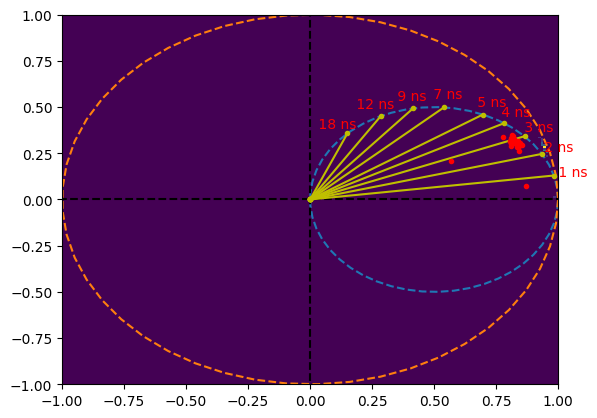

In [17]:
brighteyes_flim.plot_phasor(phasor_new, bins_2dplot=200, log_scale=False)
for i in range(0,25):
    plt.plot(np.nanmean(np.real(flim_ref.phasors_global[i])),np.nanmean(np.imag(flim_ref.phasors_global[i])),".r")
    m,phi,tau,tau_m=brighteyes_flim.calculate_m_phi_tau_phi_tau_m(flim_ref.phasors_global[i],dfd_freq=21e6)
    print("%d\tphi: %.2e\tm: %.2e\t\ttau_phi: %.2e \ttau_m: %.2e"%(i, phi, m, tau,tau_m))
    
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)

In [2]:
import h5py
import brighteyes_flim
with h5py.File('dataset_of_pixel_histogram_aligned',"a") as f:
    
        print(f.keys())
        data_input = f["h5_dataset"]  # image with histograms realigned in each pixel
        threshold=1
        harmonic=1
        merge_pixels=1
        phasor_data_size=100
       # print('data input', data_input)
        x_dim, y_dim, channel_dim = data_input.shape[0], data_input.shape[1], data_input.shape[3]

    #calculate the phasors from the histograms contained in h5_dataset
        
        fasors = brighteyes_flim.calculate_phasor_on_img_pixels(data_input)

<KeysViewHDF5 ['h5_dataset']>


<KeysViewHDF5 ['h5_dataset_phasor_pix']>


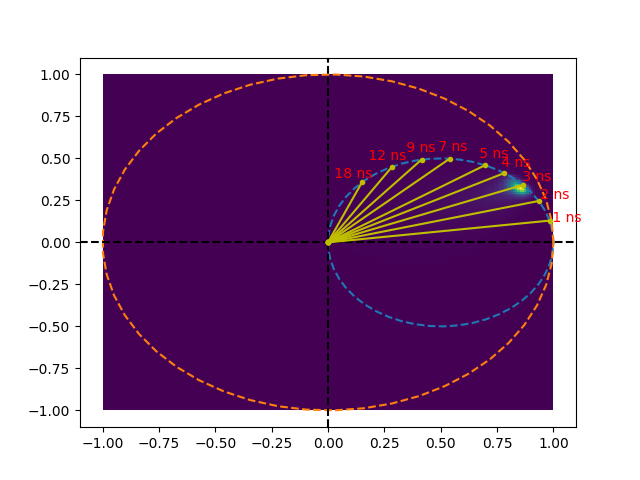

In [2]:
%matplotlib widget
import h5py
import brighteyes_flim
hf_fasori_per_pixel = h5py.File('dataset_of_phasor_per_pixel', "r")
print(hf_fasori_per_pixel.keys())

fasors_pix = hf_fasori_per_pixel["h5_dataset_phasor_pix"]  # data with phasors in each pixel
#fasors_pix[1:100, 1:100]

brighteyes_flim.plot_phasor(fasors_pix[:], bins_2dplot=200, log_scale=False)